In [18]:
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import os
import time
import numpy as np
import matplotlib.pyplot as plt
load_dotenv()

True

This Is the data collected for average college tuition costs. Does the cost of higher education impact home values in their respective cities?

In [42]:
# creating a list of states with the cities we will do our research on
states = ["GA","CA", "DC", "MI", "FL", "LA", "MD", "OR", "NV"]

# creating a list of cities we will do our research on
cities=["Atlanta","Detroit", "Tampa", "Las Vegas", "Miami", "New Orleans", "Washington", "Baltimore", "Portland", "San Francisco"] 

# reading in the csv for the school year
college_data21_22 = pd.read_csv("../Resources/data/MERGED2021_22_PP.csv", low_memory=False) 

# only the columns I want for average college tuition prices
college21_22 = college_data21_22[["INSTNM","CITY","STABBR","COSTT4_A"]]

# filtering by state first to avoid running into issues with having the same city name in different states
cf_22_df = college21_22[college21_22.isin(states).any(axis=1)]

# filtering by the cities 
cf_22_df = college21_22[college21_22.isin(cities).any(axis=1)]

# removing columns i don't need anymore
no_instnm_df = cf_22_df[["CITY","COSTT4_A"]]

# so i can have the same metric to measure change and not individual tuition prices I sum()ed the costs for each city
by_city_22 = no_instnm_df.groupby(["CITY"]).sum()

# because i want this to be time series i've renamed the avg tuition cost column to year
by_city_22 = by_city_22.rename(columns={"COSTT4_A":"2022"})
by_city_22.head(20)

# This is all just code snipets I didnt use but wanted to save to reuse later
# cf_22_df = cf_22_df.set_index("Year")
# total_cost_of_avg_tuition = cf_22_df.index.unique()
# totals_2022 = {'Period': 2013}
# print(total_cost_of_avg_tuition)

,2022
CITY,
Atlanta,483928.0
Baltimore,481237.0
Detroit,168285.0
Las Vegas,193775.0
Miami,291049.0
New Orleans,283776.0
Portland,517889.0
San Francisco,289488.0
Tampa,193075.0


In [43]:
# reading in the csv for the school year
college_data20_21 = pd.read_csv("../Resources/data/MERGED2020_21_PP.csv", low_memory=False)

# only the columns I want for average college tuition prices
college20_21 = college_data20_21[["INSTNM","CITY","STABBR","COSTT4_A"]]

# filtering by state first to avoid running into issues with having the same city name in different states
cf_21_df = college20_21[college20_21.isin(states).any(axis=1)]

# filtering by the cities 
cf_21_df = college20_21[college20_21.isin(cities).any(axis=1)]

# removing columns i don't need anymore
no_instnm_df = cf_21_df[["CITY","COSTT4_A"]]

# so i can have the same metric to measure change and not individual tuition prices I sum()ed the costs for each city
by_city_21 = no_instnm_df.groupby(["CITY"]).sum()

# because i want this to be time series i've renamed the avg tuition cost column to year
by_city_21 = by_city_21.rename(columns={"COSTT4_A":"2021"})
by_city_21.head(20)

,2021
CITY,
Atlanta,511266.0
Baltimore,484406.0
Detroit,201560.0
Las Vegas,187592.0
Miami,363837.0
New Orleans,274782.0
Portland,520852.0
San Francisco,411312.0
Tampa,160918.0


In [44]:
# reading in the csv for the school year
college_data19_20 = pd.read_csv("../Resources/data/MERGED2019_20_PP.csv", low_memory=False)

# only the columns I want for average college tuition prices
college19_20 = college_data19_20[["INSTNM","CITY","STABBR","COSTT4_A"]]

# filtering by state first to avoid running into issues with having the same city name in different states
cf_20_df = college19_20[college19_20.isin(states).any(axis=1)]

# filtering by the cities 
cf_20_df = college19_20[college19_20.isin(cities).any(axis=1)]

# removing columns i don't need anymore
no_instnm_df = cf_20_df[["CITY","COSTT4_A"]]

# so i can have the same metric to measure change and not individual tuition prices I sum()ed the costs for each city
by_city_20 = no_instnm_df.groupby(["CITY"]).sum()

# because i want this to be time series i've renamed the avg tuition cost column to year
by_city_20 = by_city_20.rename(columns={"COSTT4_A":"2020"})
by_city_20.head(20)

,2020
CITY,
Atlanta,529768.0
Baltimore,503862.0
Detroit,163384.0
Las Vegas,159295.0
Miami,345087.0
New Orleans,266054.0
Portland,500394.0
San Francisco,395904.0
Tampa,149995.0


In [45]:
# reading in the csv for the school year
college_data18_19 = pd.read_csv("../Resources/data/MERGED2018_19_PP.csv", low_memory=False)

# only the columns I want for average college tuition prices
college18_19 = college_data18_19[["INSTNM","CITY","STABBR","COSTT4_A"]]

# filtering by state first to avoid running into issues with having the same city name in different states
cf_19_df = college18_19[college18_19.isin(states).any(axis=1)]

# filtering by the cities 
cf_19_df = college18_19[college18_19.isin(cities).any(axis=1)]

# removing columns i don't need anymore
no_instnm_df = cf_19_df[["CITY","COSTT4_A"]]

# so i can have the same metric to measure change and not individual tuition prices I sum()ed the costs for each city
by_city_19 = no_instnm_df.groupby(["CITY"]).sum()

# because i want this to be time series i've renamed the avg tuition cost column to year
by_city_19 = by_city_19.rename(columns={"COSTT4_A":"2019"})
by_city_19.head(20)

,2019
CITY,
Atlanta,465762.0
Baltimore,490133.0
Detroit,177947.0
Las Vegas,204496.0
Miami,327356.0
New Orleans,255567.0
Portland,564857.0
San Francisco,433473.0
Tampa,148165.0


In [46]:
# reading in the csv for the school year
college_data17_18 = pd.read_csv("../Resources/data/MERGED2017_18_PP.csv", low_memory=False)

# only the columns I want for average college tuition prices
college17_18 = college_data17_18[["INSTNM","CITY","STABBR","COSTT4_A"]] 

# filtering by state first to avoid running into issues with having the same city name in different states
cf_18_df = college17_18[college17_18.isin(states).any(axis=1)]

# filtering by the cities 
cf_18_df = college17_18[college17_18.isin(cities).any(axis=1)]

# removing columns i don't need anymore
no_instnm_df = cf_18_df[["CITY","COSTT4_A"]]

# so i can have the same metric to measure change and not individual tuition prices I sum()ed the costs for each city
by_city_18 = no_instnm_df.groupby(["CITY"]).sum()

# because i want this to be time series i've renamed the avg tuition cost column to year
by_city_18 = by_city_18.rename(columns={"COSTT4_A":"2018"})
by_city_18.head(20)

,2018
CITY,
Atlanta,605684.0
Baltimore,483627.0
Detroit,230922.0
Las Vegas,195487.0
Miami,349313.0
New Orleans,247479.0
Portland,590251.0
San Francisco,451850.0
Tampa,217033.0


In [47]:
# reading in the csv for the school year
college_data16_17 = pd.read_csv("../Resources/data/MERGED2016_17_PP.csv", low_memory=False)

# only the columns I want for average college tuition prices
college16_17 = college_data16_17[["INSTNM","CITY","STABBR","COSTT4_A"]] 

# filtering by state first to avoid running into issues with having the same city name in different states
cf_17_df = college16_17[college16_17.isin(states).any(axis=1)]

# filtering by the cities 
cf_17_df = college16_17[college16_17.isin(cities).any(axis=1)]

# removing columns i don't need anymore
no_instnm_df = cf_17_df[["CITY","COSTT4_A"]]

# so i can have the same metric to measure change and not individual tuition prices I sum()ed the costs for each city
by_city_17 = no_instnm_df.groupby(["CITY"]).sum()

# because i want this to be time series i've renamed the avg tuition cost column to year
by_city_17 = by_city_17.rename(columns={"COSTT4_A":"2017"})
by_city_17.head(20)

,2017
CITY,
Atlanta,577167.0
Baltimore,467507.0
Detroit,228012.0
Las Vegas,192521.0
Miami,365368.0
New Orleans,242158.0
Portland,576220.0
San Francisco,436999.0
Tampa,237369.0


In [48]:
# reading in the csv for the school year
college_data15_16 = pd.read_csv("../Resources/data/MERGED2015_16_PP.csv", low_memory=False)

# only the columns I want for average college tuition prices
college15_16 = college_data15_16[["INSTNM","CITY","STABBR","COSTT4_A"]]

# filtering by state first to avoid running into issues with having the same city name in different states
cf_16_df = college15_16[college15_16.isin(states).any(axis=1)]

# filtering by the cities 
cf_16_df = college15_16[college15_16.isin(cities).any(axis=1)]

# removing columns i don't need anymore
no_instnm_df = cf_16_df[["CITY","COSTT4_A"]]

# so i can have the same metric to measure change and not individual tuition prices I sum()ed the costs for each city
by_city_16 = no_instnm_df.groupby(["CITY"]).sum()

# because i want this to be time series i've renamed the avg tuition cost column to year
by_city_16 = by_city_16.rename(columns={"COSTT4_A":"2016"})
by_city_16.head(20)

,2016
CITY,
Atlanta,624091.0
Baltimore,458174.0
Detroit,225343.0
Las Vegas,154846.0
Miami,382940.0
New Orleans,231754.0
Portland,666107.0
San Francisco,401673.0
Tampa,280850.0


In [49]:
# reading in the csv for the school year
college_data14_15 = pd.read_csv("../Resources/data/MERGED2014_15_PP.csv", low_memory=False)

# only the columns I want for average college tuition prices
college14_15 = college_data14_15[["INSTNM","CITY","STABBR","COSTT4_A"]]

# filtering by state first to avoid running into issues with having the same city name in different states
cf_15_df = college14_15[college14_15.isin(states).any(axis=1)]

# filtering by the cities 
cf_15_df = college14_15[college14_15.isin(cities).any(axis=1)]

# removing columns i don't need anymore
no_instnm_df = cf_15_df[["CITY","COSTT4_A"]]

# so i can have the same metric to measure change and not individual tuition prices I sum()ed the costs for each city
by_city_15 = no_instnm_df.groupby(["CITY"]).sum()

# because i want this to be time series i've renamed the avg tuition cost column to year
by_city_15 = by_city_15.rename(columns={"COSTT4_A":"2015"})
by_city_15.head(20)

,2015
CITY,
Atlanta,750663.0
Baltimore,473570.0
Detroit,189721.0
Las Vegas,154465.0
Miami,447990.0
New Orleans,223392.0
Portland,658226.0
San Francisco,415834.0
Tampa,389584.0


In [95]:
# reading in the csv for the school year
college_data13_14 = pd.read_csv("../Resources/data/MERGED2013_14_PP.csv", low_memory=False)

# only the columns I want for average college tuition prices
college13_14 = college_data13_14[["INSTNM","CITY","STABBR","COSTT4_A"]]

# filtering by state first to avoid running into issues with having the same city name in different states
cf_14_df = college13_14[college13_14.isin(states).any(axis=1)]

# filtering by the cities 
cf_14_df = college13_14[college13_14.isin(cities).any(axis=1)]

# removing columns i don't need anymore
no_instnm_df = cf_14_df[["CITY","COSTT4_A"]]

# so i can have the same metric to measure change and not individual tuition prices I sum()ed the costs for each city
by_city_14 = no_instnm_df.groupby(["CITY"]).sum()

# because i want this to be time series i've renamed the avg tuition cost column to year
by_city_14 = by_city_14.rename(columns={"COSTT4_A":"2014"})
by_city_14.head(20)

,2014
CITY,
Atlanta,749715.0
Baltimore,435128.0
Detroit,150288.0
Las Vegas,150974.0
Miami,440935.0
New Orleans,215796.0
Portland,650192.0
San Francisco,406079.0
Tampa,412000.0


In [51]:
# reading in the csv for the school year
college_data12_13 = pd.read_csv("../Resources/data/MERGED2012_13_PP.csv", low_memory=False)

# only the columns I want for average college tuition prices
college12_13 = college_data12_13[["INSTNM","CITY","STABBR","COSTT4_A"]]

# filtering by state first to avoid running into issues with having the same city name in different states
cf_13_df = college12_13[college12_13.isin(states).any(axis=1)]

# filtering by the cities 
cf_13_df = college12_13[college12_13.isin(cities).any(axis=1)]

# removing columns i don't need anymore
no_instnm_df = cf_13_df[["CITY","COSTT4_A"]]

# so i can have the same metric to measure change and not individual tuition prices I sum()ed the costs for each city
by_city_13 = no_instnm_df.groupby(["CITY"]).sum()

# because i want this to be time series i've renamed the avg tuition cost column to year
by_city_13 = by_city_13.rename(columns={"COSTT4_A":"2013"})
by_city_13.head(20)

,2013
CITY,
Atlanta,676355.0
Baltimore,422515.0
Detroit,176173.0
Las Vegas,123665.0
Miami,427420.0
New Orleans,212705.0
Portland,636333.0
San Francisco,397128.0
Tampa,464117.0


In [54]:
# Now that i have a data set for each year I concatinated them together into one dataframe
merged_college_cost = pd.concat([by_city_13, by_city_14, by_city_15, by_city_16, by_city_17, by_city_18, by_city_19, by_city_20, by_city_21, by_city_22], axis="columns", join="inner")
merged_college_cost.head(10)

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
CITY,,,,,,,,,,
Atlanta,676355.0,749715.0,750663.0,624091.0,577167.0,605684.0,465762.0,529768.0,511266.0,483928.0
Baltimore,422515.0,435128.0,473570.0,458174.0,467507.0,483627.0,490133.0,503862.0,484406.0,481237.0
Detroit,176173.0,150288.0,189721.0,225343.0,228012.0,230922.0,177947.0,163384.0,201560.0,168285.0
Las Vegas,123665.0,150974.0,154465.0,154846.0,192521.0,195487.0,204496.0,159295.0,187592.0,193775.0
Miami,427420.0,440935.0,447990.0,382940.0,365368.0,349313.0,327356.0,345087.0,363837.0,291049.0
New Orleans,212705.0,215796.0,223392.0,231754.0,242158.0,247479.0,255567.0,266054.0,274782.0,283776.0
Portland,636333.0,650192.0,658226.0,666107.0,576220.0,590251.0,564857.0,500394.0,520852.0,517889.0
San Francisco,397128.0,406079.0,415834.0,401673.0,436999.0,451850.0,433473.0,395904.0,411312.0,289488.0
Tampa,464117.0,412000.0,389584.0,280850.0,237369.0,217033.0,148165.0,149995.0,160918.0,193075.0


In [57]:
# The transpose() command swaps the rows and columns
merged_college_cost = merged_college_cost.transpose()
merged_college_cost.head(10)

CITY,Atlanta,Baltimore,Detroit,Las Vegas,Miami,New Orleans,Portland,San Francisco,Tampa,Washington
2013,676355.0,422515.0,176173.0,123665.0,427420.0,212705.0,636333.0,397128.0,464117.0,650348.0
2014,749715.0,435128.0,150288.0,150974.0,440935.0,215796.0,650192.0,406079.0,412000.0,638111.0
2015,750663.0,473570.0,189721.0,154465.0,447990.0,223392.0,658226.0,415834.0,389584.0,619066.0
2016,624091.0,458174.0,225343.0,154846.0,382940.0,231754.0,666107.0,401673.0,280850.0,666119.0
2017,577167.0,467507.0,228012.0,192521.0,365368.0,242158.0,576220.0,436999.0,237369.0,644572.0
2018,605684.0,483627.0,230922.0,195487.0,349313.0,247479.0,590251.0,451850.0,217033.0,644771.0
2019,465762.0,490133.0,177947.0,204496.0,327356.0,255567.0,564857.0,433473.0,148165.0,620682.0
2020,529768.0,503862.0,163384.0,159295.0,345087.0,266054.0,500394.0,395904.0,149995.0,651226.0
2021,511266.0,484406.0,201560.0,187592.0,363837.0,274782.0,520852.0,411312.0,160918.0,656544.0
2022,483928.0,481237.0,168285.0,193775.0,291049.0,283776.0,517889.0,289488.0,193075.0,632122.0


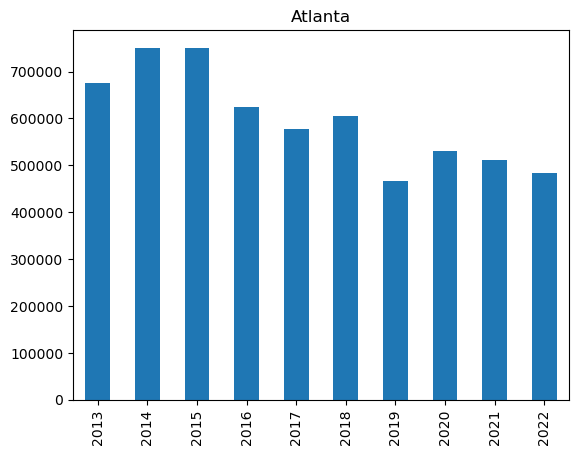

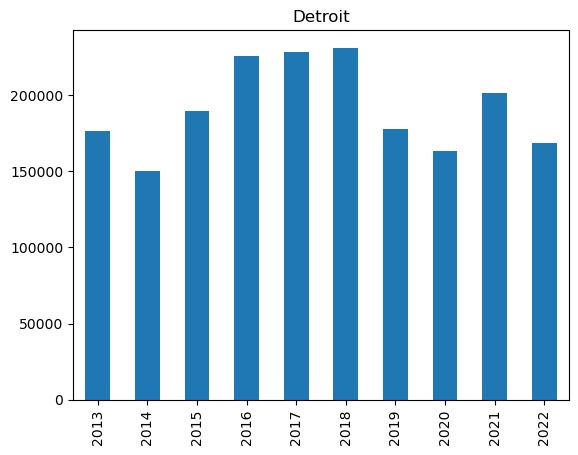

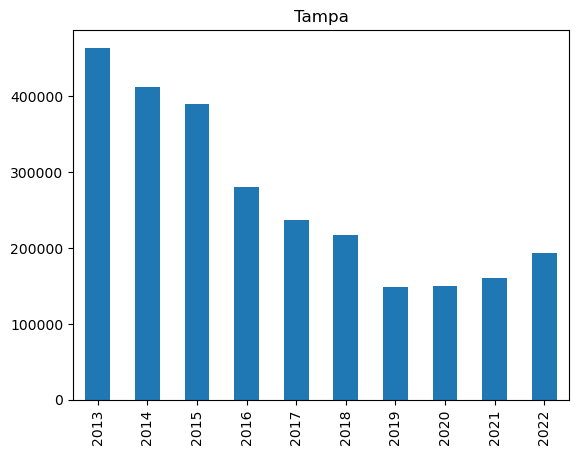

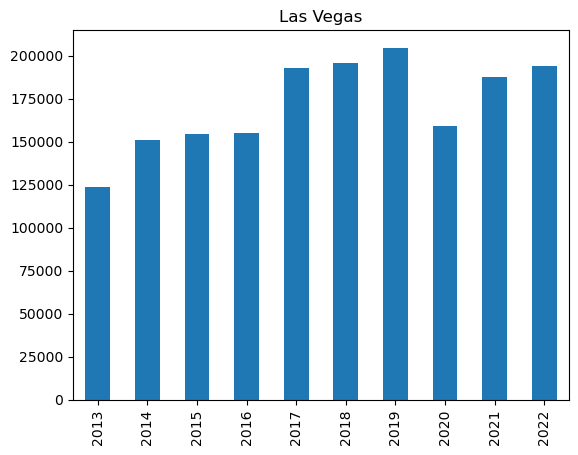

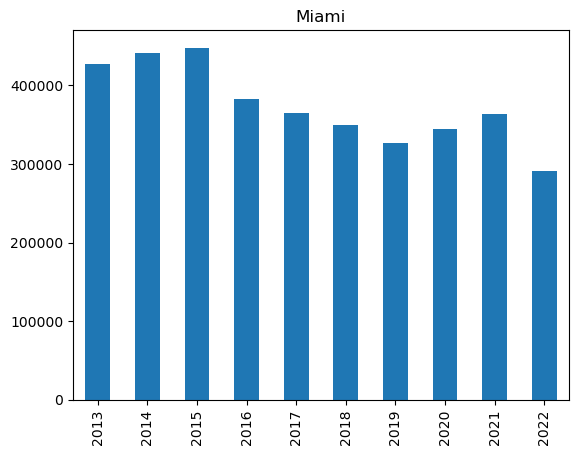

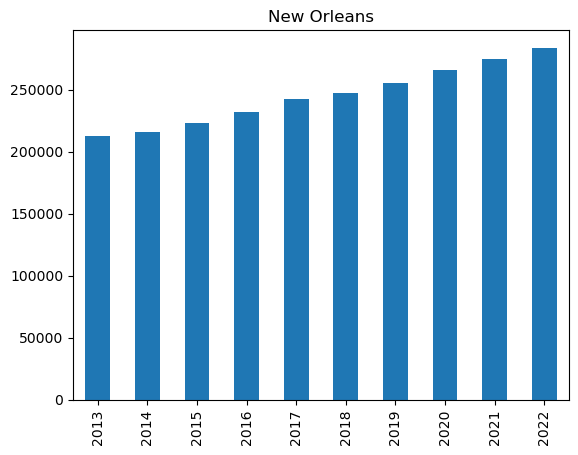

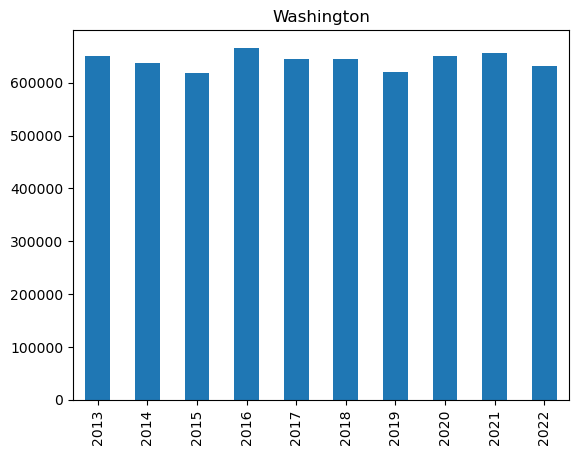

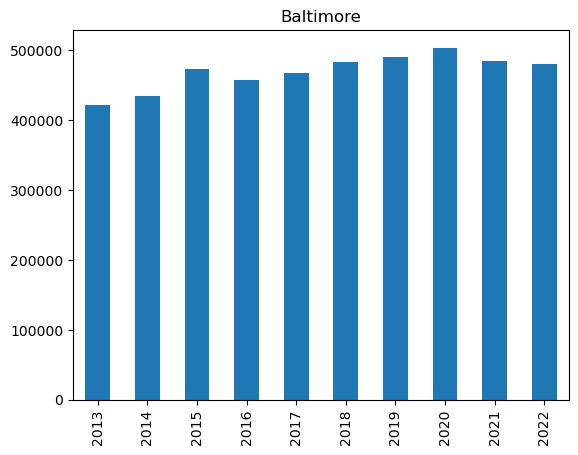

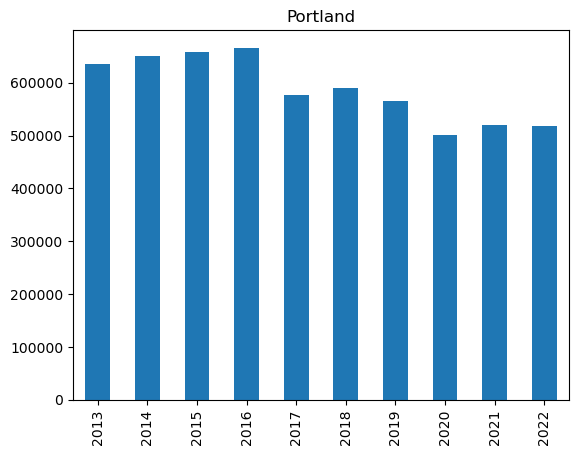

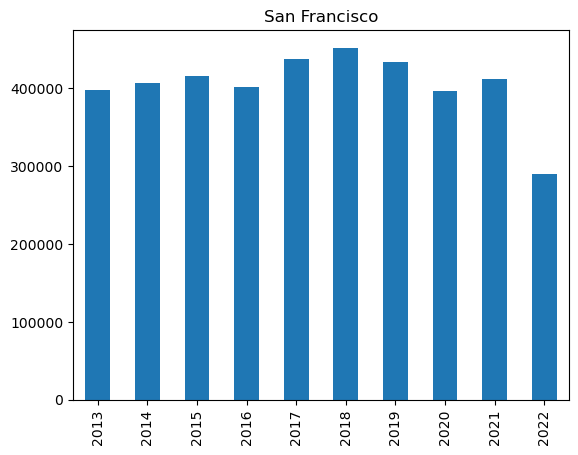

In [58]:
# This for loop goes through each city in the cities list we made earlier and plots a bar graph so we can see the change over 10 years
for city in cities:
    current_college_city = merged_college_cost[[city]].plot(kind="bar", title=city, legend=False)
    plt.show()

As you can see the costs of College Tuition has gone up in some of the Cities we looked into and down is others. The cost of Higher education does not seem to have any significate impact on the cost of homes in their respective cities.

Now I wanted to see if average inteligence has an impact on Home Values in the 10 cities we are looking at. to get some measure of what "average intelligence" can be measure by, I took the average SAT scores for the colleges in the cities we were looking at and how much they changed over the same 10 years.

In [74]:
 # read in the data
sat_data21_22 = pd.read_csv("../Resources/data/MERGED2021_22_PP.csv", low_memory=False)

 #only the columns I want for sat averages
sat_data21_22 = sat_data21_22[["INSTNM","CITY","STABBR", "SAT_AVG"]]

# filter out the states
sat_data21_22 = sat_data21_22[sat_data21_22.isin(states).any(axis=1)] 

# filter out the cities
sat_data21_22 = sat_data21_22[sat_data21_22.isin(cities).any(axis=1)]

# take just the city and sat averages
sat_data21_22 = sat_data21_22[["CITY","SAT_AVG"]] 

# sort by city and take the average SAT score for that city
sat_by_city_22 = sat_data21_22.groupby(["CITY"]).mean()

# drop the columns with "NaN" 
sat_by_city_22.dropna(how='any')

# rename the average score column to the year
sat_by_city_22 = sat_by_city_22.rename(columns={"SAT_AVG":"2022"}) 
display(sat_by_city_22)


,2022
CITY,
Atlanta,1235.166667
Baltimore,1098.800000
Detroit,1163.500000
Las Vegas,NaN
Miami,1155.000000
New Orleans,1139.800000
Portland,1243.666667
San Francisco,1305.000000
Tampa,1214.500000


In [75]:
# read in the data
sat_data20_21 = pd.read_csv("../Resources/data/MERGED2020_21_PP.csv", low_memory=False) 

#only the columns I want for sat averages
sat_data20_21 = sat_data20_21[["INSTNM","CITY","STABBR", "SAT_AVG"]] 

# filter out the states
sat_data20_21 = sat_data20_21[sat_data20_21.isin(states).any(axis=1)] 

# filter out the cities
sat_data20_21 = sat_data20_21[sat_data20_21.isin(cities).any(axis=1)] 

# take just the city and sat averages
sat_data20_21 = sat_data20_21[["CITY","SAT_AVG"]] 

# sort by city and take the average SAT score for that city
sat_by_city_21 = sat_data20_21.groupby(["CITY"]).mean() 

# drop the columns with "NaN"
sat_by_city_21.dropna(how='any') 

# rename the average score column to the year
sat_by_city_21 = sat_by_city_21.rename(columns={"SAT_AVG":"2021"}) 
display(sat_by_city_21)

,2021
CITY,
Atlanta,1229.5
Baltimore,1139.0
Detroit,1138.5
Las Vegas,1124.0
Miami,1190.0
New Orleans,1126.0
Portland,1210.0
San Francisco,1139.0
Tampa,1215.0


In [76]:
# read in the data
sat_data19_20 = pd.read_csv("../Resources/data/MERGED2019_20_PP.csv", low_memory=False)

#only the columns I want for sat averages
sat_data19_20 = sat_data19_20[["INSTNM","CITY","STABBR", "SAT_AVG"]]

# filter out the states
sat_data19_20 = sat_data19_20[sat_data19_20.isin(states).any(axis=1)]

# filter out the cities
sat_data19_20 = sat_data19_20[sat_data19_20.isin(cities).any(axis=1)]

# take just the city and sat averages
sat_data19_20 = sat_data19_20[["CITY","SAT_AVG"]] 

# sort by city and take the average SAT score for that city
sat_by_city_20 = sat_data19_20.groupby(["CITY"]).mean() 

# drop the columns with "NaN" 
sat_by_city_20.dropna(how='any') 

# rename the average score column to the year
sat_by_city_20 = sat_by_city_20.rename(columns={"SAT_AVG":"2020"}) 
display(sat_by_city_20)

,2020
CITY,
Atlanta,1213.428571
Baltimore,1112.250000
Detroit,1151.000000
Las Vegas,1126.000000
Miami,1103.500000
New Orleans,1148.666667
Portland,1235.600000
San Francisco,1141.000000
Tampa,1228.500000


In [77]:
# read in the data
sat_data18_19 = pd.read_csv("../Resources/data/MERGED2018_19_PP.csv", low_memory=False) 

#only the columns I want for sat averages
sat_data18_19 = sat_data18_19[["INSTNM","CITY","STABBR", "SAT_AVG"]] 

# filter out the states
sat_data18_19 = sat_data18_19[sat_data18_19.isin(states).any(axis=1)] 

# filter out the cities
sat_data18_19 = sat_data18_19[sat_data18_19.isin(cities).any(axis=1)] 

# take just the city and sat averages
sat_data18_19 = sat_data18_19[["CITY","SAT_AVG"]] 

# sort by city and take the average SAT score for that city
sat_by_city_19 = sat_data18_19.groupby(["CITY"]).mean() 

# drop the columns with "NaN" 
sat_by_city_19.dropna(how='any') 

# rename the average score column to the year
sat_by_city_19 = sat_by_city_19.rename(columns={"SAT_AVG":"2019"}) 
display(sat_by_city_19)

,2019
CITY,
Atlanta,1227.571429
Baltimore,1144.285714
Detroit,1129.000000
Las Vegas,1113.000000
Miami,1104.500000
New Orleans,1162.800000
Portland,1209.750000
San Francisco,1145.500000
Tampa,1165.000000


In [78]:
# read in the data
sat_data17_18 = pd.read_csv("../Resources/data/MERGED2017_18_PP.csv", low_memory=False) 

#only the columns I want for sat averages
sat_data17_18 = sat_data17_18[["INSTNM","CITY","STABBR", "SAT_AVG"]] 

# filter out the states
sat_data17_18 = sat_data17_18[sat_data17_18.isin(states).any(axis=1)] 

# filter out the cities
sat_data17_18 = sat_data17_18[sat_data17_18.isin(cities).any(axis=1)] 

# take just the city and sat averages
sat_data17_18 = sat_data17_18[["CITY","SAT_AVG"]] 

# sort by city and take the average SAT score for that city
sat_by_city_18 = sat_data17_18.groupby(["CITY"]).mean() 

# drop the columns with "NaN" 
sat_by_city_18.dropna(how='any') 

# rename the average score column to the year
sat_by_city_18 = sat_by_city_18.rename(columns={"SAT_AVG":"2018"}) 
display(sat_by_city_18)

,2018
CITY,
Atlanta,1197.857143
Baltimore,1125.857143
Detroit,1116.750000
Las Vegas,1100.000000
Miami,1071.000000
New Orleans,1118.000000
Portland,1229.800000
San Francisco,1128.500000
Tampa,1208.500000


In [79]:
# read in the data
sat_data16_17 = pd.read_csv("../Resources/data/MERGED2016_17_PP.csv", low_memory=False) 

#only the columns I want for sat averages
sat_data16_17 = sat_data16_17[["INSTNM","CITY","STABBR", "SAT_AVG"]] 

# filter out the states
sat_data16_17 = sat_data16_17[sat_data16_17.isin(states).any(axis=1)] 

# filter out the cities
sat_data16_17 = sat_data16_17[sat_data16_17.isin(cities).any(axis=1)] 

# take just the city and sat averages
sat_data16_17 = sat_data16_17[["CITY","SAT_AVG"]] 

# sort by city and take the average SAT score for that city
sat_by_city_17 = sat_data16_17.groupby(["CITY"]).mean() 

# drop the columns with "NaN" 
sat_by_city_17.dropna(how='any') 

# rename the average score column to the year
sat_by_city_17 = sat_by_city_17.rename(columns={"SAT_AVG":"2017"}) 
display(sat_by_city_17)

,2017
CITY,
Atlanta,1144.142857
Baltimore,1078.428571
Detroit,1027.500000
Las Vegas,1012.000000
Miami,1030.000000
New Orleans,1047.142857
Portland,1176.800000
San Francisco,1064.500000
Tampa,1134.500000


In [80]:
# read in the data
sat_data15_16 = pd.read_csv("../Resources/data/MERGED2015_16_PP.csv", low_memory=False) 

#only the columns I want for sat averages
sat_data15_16 = sat_data15_16[["INSTNM","CITY","STABBR", "SAT_AVG"]] 

# filter out the states
sat_data15_16 = sat_data15_16[sat_data15_16.isin(states).any(axis=1)] 

# filter out the cities
sat_data15_16 = sat_data15_16[sat_data15_16.isin(cities).any(axis=1)] 

# take just the city and sat averages
sat_data15_16 = sat_data15_16[["CITY","SAT_AVG"]] 

# sort by city and take the average SAT score for that city
sat_by_city_16 = sat_data15_16.groupby(["CITY"]).mean() 

# drop the columns with "NaN" 
sat_by_city_16.dropna(how='any') 

# rename the average score column to the year
sat_by_city_16 = sat_by_city_16.rename(columns={"SAT_AVG":"2016"}) 
display(sat_by_city_16)

,2016
CITY,
Atlanta,1117.428571
Baltimore,1089.571429
Detroit,1010.500000
Las Vegas,1007.000000
Miami,1008.000000
New Orleans,1042.500000
Portland,1153.000000
San Francisco,1075.500000
Tampa,1134.500000


In [81]:
# read in the data
sat_data14_15 = pd.read_csv("../Resources/data/MERGED2014_15_PP.csv", low_memory=False) 

#only the columns I want for sat averages
sat_data14_15 = sat_data14_15[["INSTNM","CITY","STABBR", "SAT_AVG"]] 

# filter out the states
sat_data14_15 = sat_data14_15[sat_data14_15.isin(states).any(axis=1)] 

# filter out the cities
sat_data14_15 = sat_data14_15[sat_data14_15.isin(cities).any(axis=1)] 

# take just the city and sat averages
sat_data14_15 = sat_data14_15[["CITY","SAT_AVG"]] 

# sort by city and take the average SAT score for that city
sat_by_city_15 = sat_data14_15.groupby(["CITY"]).mean() 

# drop the columns with "NaN" 
sat_by_city_15.dropna(how='any') 

# rename the average score column to the year
sat_by_city_15 = sat_by_city_15.rename(columns={"SAT_AVG":"2015"}) 
display(sat_by_city_15)

,2015
CITY,
Atlanta,1118.428571
Baltimore,1077.000000
Detroit,997.500000
Las Vegas,1000.000000
Miami,1013.500000
New Orleans,1048.333333
Portland,1138.400000
San Francisco,1071.000000
Tampa,1128.000000


In [82]:
# read in the data
sat_data13_14 = pd.read_csv("../Resources/data/MERGED2013_14_PP.csv", low_memory=False) 

#only the columns I want for sat averages
sat_data13_14 = sat_data13_14[["INSTNM","CITY","STABBR", "SAT_AVG"]] 

# filter out the states
sat_data13_14 = sat_data13_14[sat_data13_14.isin(states).any(axis=1)] 

# filter out the cities
sat_data13_14 = sat_data13_14[sat_data13_14.isin(cities).any(axis=1)] 

# take just the city and sat averages
sat_data13_14 = sat_data13_14[["CITY","SAT_AVG"]] 

# sort by city and take the average SAT score for that city
sat_by_city_14 = sat_data13_14.groupby(["CITY"]).mean() 

# drop the columns with "NaN"
sat_by_city_14.dropna(how='any')  

# rename the average score column to the year
sat_by_city_14 = sat_by_city_14.rename(columns={"SAT_AVG":"2014"}) 
display(sat_by_city_14)

,2014
CITY,
Atlanta,1114.285714
Baltimore,1093.125000
Detroit,995.500000
Las Vegas,1003.000000
Miami,1013.000000
New Orleans,1049.333333
Portland,1164.500000
San Francisco,1073.333333
Tampa,1121.500000


In [83]:
# read in the data
sat_data12_13 = pd.read_csv("../Resources/data/MERGED2012_13_PP.csv", low_memory=False) 

#only the columns I want for sat averages
sat_data12_13 = sat_data12_13[["INSTNM","CITY","STABBR", "SAT_AVG"]] 

# filter out the states
sat_data12_13 = sat_data12_13[sat_data12_13.isin(states).any(axis=1)] 

# filter out the cities
sat_data12_13 = sat_data12_13[sat_data12_13.isin(cities).any(axis=1)] 

# take just the city and sat averages
sat_data12_13 = sat_data12_13[["CITY","SAT_AVG"]] 

# sort by city and take the average SAT score for that city
sat_by_city_13 = sat_data12_13.groupby(["CITY"]).mean() 

# drop the columns with "NaN" 
sat_by_city_13.dropna(how='any') 

# rename the average score column to the year
sat_by_city_13 = sat_by_city_13.rename(columns={"SAT_AVG":"2013"}) 
display(sat_by_city_13)

,2013
CITY,
Atlanta,1125.000000
Baltimore,1091.750000
Detroit,1022.400000
Las Vegas,993.000000
Miami,1038.500000
New Orleans,1052.833333
Portland,1110.833333
San Francisco,1057.750000
Tampa,1126.500000


In [84]:
# Concating all the files together to make a sigle data set
merged_avg_sat = pd.concat([sat_by_city_13, sat_by_city_14, sat_by_city_15, sat_by_city_16, sat_by_city_17, sat_by_city_18, sat_by_city_19, sat_by_city_20, sat_by_city_21, sat_by_city_22], axis="columns", join="inner")
merged_avg_sat.head(10)

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
CITY,,,,,,,,,,
Atlanta,1125.000000,1114.285714,1118.428571,1117.428571,1144.142857,1197.857143,1227.571429,1213.428571,1229.5,1235.166667
Baltimore,1091.750000,1093.125000,1077.000000,1089.571429,1078.428571,1125.857143,1144.285714,1112.250000,1139.0,1098.800000
Detroit,1022.400000,995.500000,997.500000,1010.500000,1027.500000,1116.750000,1129.000000,1151.000000,1138.5,1163.500000
Las Vegas,993.000000,1003.000000,1000.000000,1007.000000,1012.000000,1100.000000,1113.000000,1126.000000,1124.0,NaN
Miami,1038.500000,1013.000000,1013.500000,1008.000000,1030.000000,1071.000000,1104.500000,1103.500000,1190.0,1155.000000
New Orleans,1052.833333,1049.333333,1048.333333,1042.500000,1047.142857,1118.000000,1162.800000,1148.666667,1126.0,1139.800000
Portland,1110.833333,1164.500000,1138.400000,1153.000000,1176.800000,1229.800000,1209.750000,1235.600000,1210.0,1243.666667
San Francisco,1057.750000,1073.333333,1071.000000,1075.500000,1064.500000,1128.500000,1145.500000,1141.000000,1139.0,1305.000000
Tampa,1126.500000,1121.500000,1128.000000,1134.500000,1134.500000,1208.500000,1165.000000,1228.500000,1215.0,1214.500000


In [85]:
# Swaping the rows and columns
merged_avg_sat = merged_avg_sat.transpose() 
merged_avg_sat.head(10)

CITY,Atlanta,Baltimore,Detroit,Las Vegas,Miami,New Orleans,Portland,San Francisco,Tampa,Washington
2013,1125.000000,1091.750000,1022.40,993.0,1038.5,1052.833333,1110.833333,1057.750000,1126.5,1165.833333
2014,1114.285714,1093.125000,995.50,1003.0,1013.0,1049.333333,1164.500000,1073.333333,1121.5,1165.500000
2015,1118.428571,1077.000000,997.50,1000.0,1013.5,1048.333333,1138.400000,1071.000000,1128.0,1174.500000
2016,1117.428571,1089.571429,1010.50,1007.0,1008.0,1042.500000,1153.000000,1075.500000,1134.5,1190.000000
2017,1144.142857,1078.428571,1027.50,1012.0,1030.0,1047.142857,1176.800000,1064.500000,1134.5,1190.600000
2018,1197.857143,1125.857143,1116.75,1100.0,1071.0,1118.000000,1229.800000,1128.500000,1208.5,1249.600000
2019,1227.571429,1144.285714,1129.00,1113.0,1104.5,1162.800000,1209.750000,1145.500000,1165.0,1264.200000
2020,1213.428571,1112.250000,1151.00,1126.0,1103.5,1148.666667,1235.600000,1141.000000,1228.5,1262.000000
2021,1229.500000,1139.000000,1138.50,1124.0,1190.0,1126.000000,1210.000000,1139.000000,1215.0,1256.400000
2022,1235.166667,1098.800000,1163.50,NaN,1155.0,1139.800000,1243.666667,1305.000000,1214.5,1282.000000


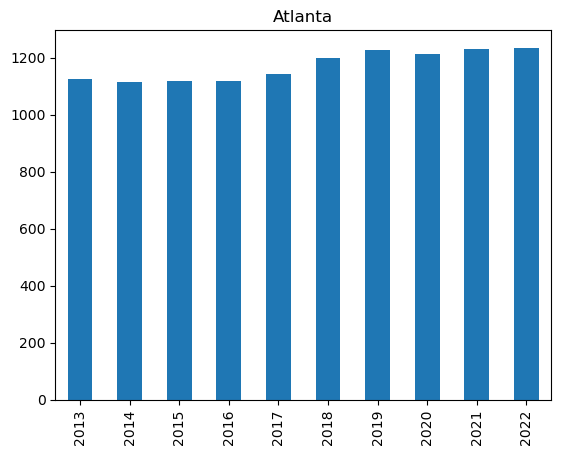

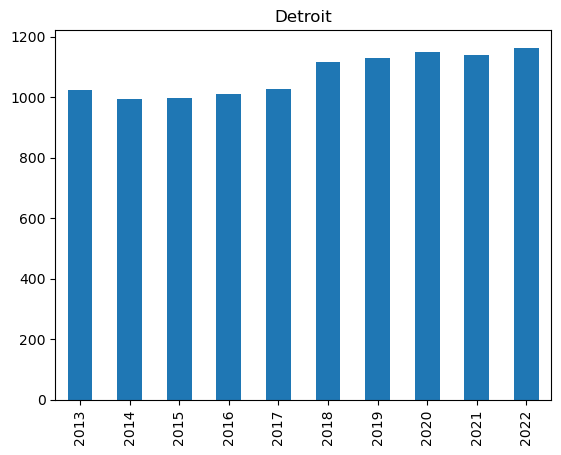

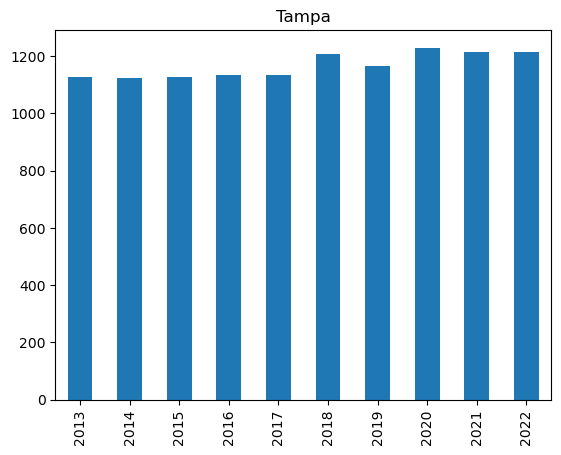

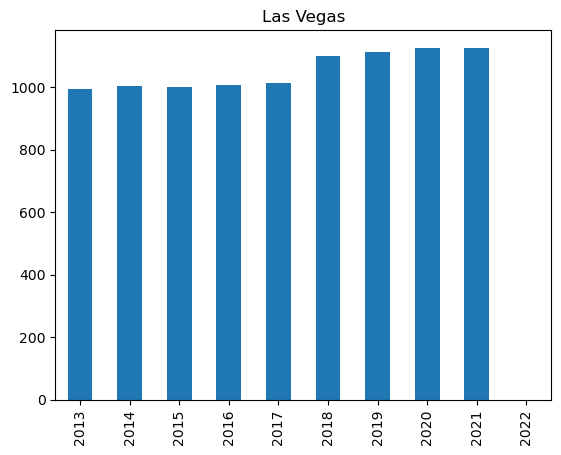

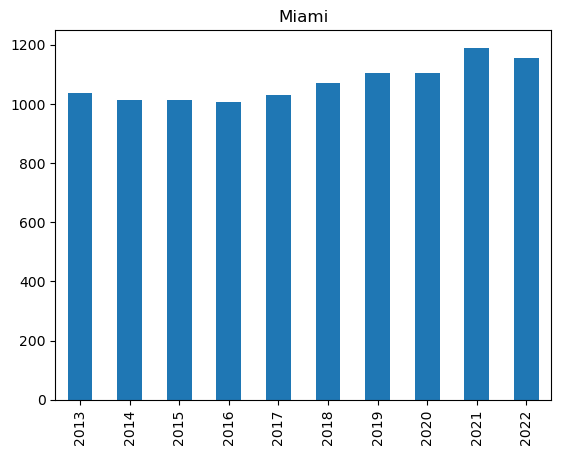

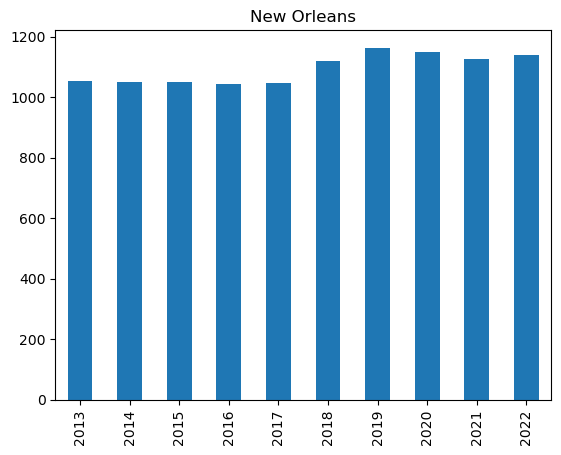

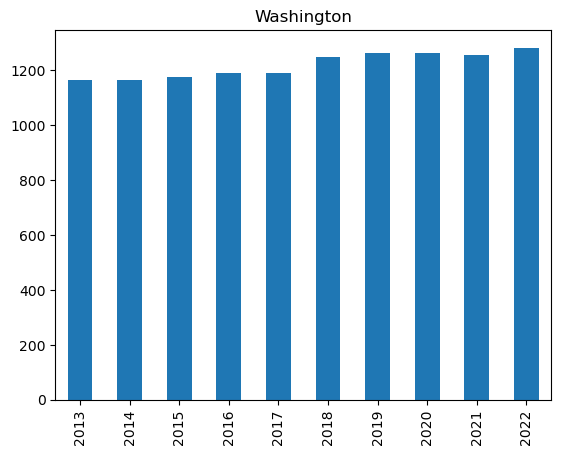

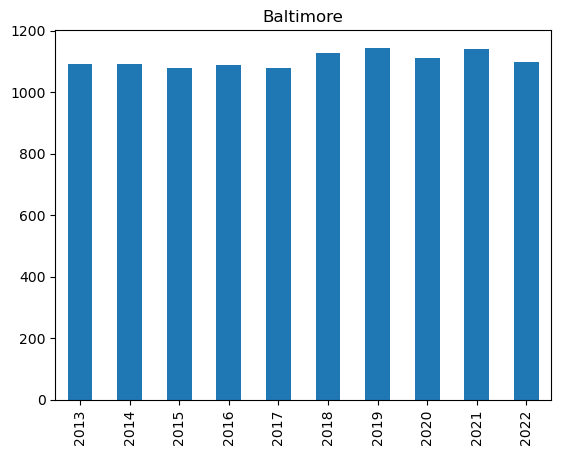

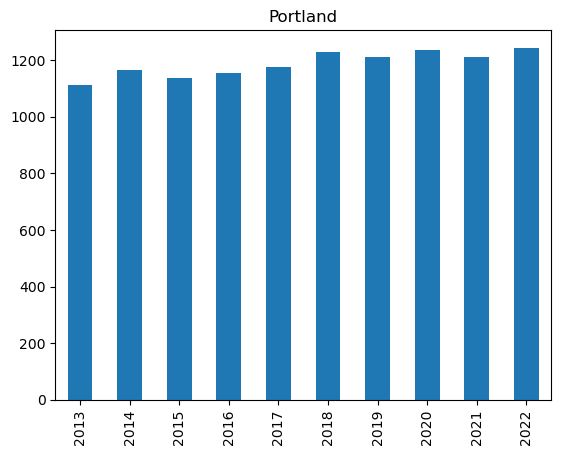

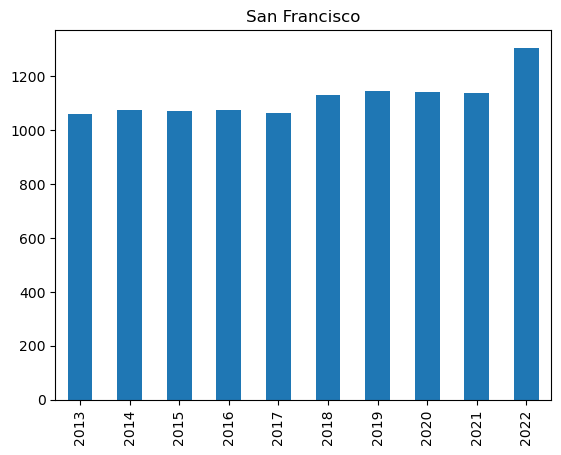

In [86]:
# this loop plots a bar graph for each city to show the trending patterns we saw
for city in cities:
    current_sat_college_city = merged_avg_sat[[city]].plot(kind="bar", title=city, legend=False)
    plt.show()

What I found is that in every city beside baltimore there is a noticable increase in the average SAT scores over the last 10 years. More intelligent home buys might be a contributing factor in the increase in home values

Below is the initial code used as a baseline for the the overall question of the group: "Whats Driving Home Prices up?" 

In [89]:
# reading in the hopuse values dataset
house_values_df = pd.read_csv("house_values_zillow.csv")

# filtering down to just the columns we need to run the analysis on
hv_filtered = house_values_df[["RegionName", "StateName", "Metro","2012-01-31","2013-01-31","2014-01-31","2015-01-31","2016-01-31","2017-01-31","2018-01-31","2019-01-31","2020-01-31","2021-01-31","2022-01-31"]] #only the columns I want

# this was the original location of the states list. it was moved higher to be used by the other filters
states = ["GA","CA", "DC", "MI", "FL", "LA", "MD", "OR", "NV"]

# a list to filter down to just the metro areas we were interested in
metro = ["Las Vegas-Henderson-Paradise, NV", "San Francisco-Oakland-Berkeley, CA", "Miami-Fort Lauderdale-Pompano Beach, FL", "Portland-Vancouver-Hillsboro, OR-WA", "Washington-Arlington-Alexandria, DC-VA-MD-WV", "Detroit-Warren-Dearborn, MI", "Baltimore-Columbia-Towson, MD", "Atlanta-Sandy Springs-Alpharetta, GA", "Tampa-St. Petersburg-Clearwater, FL", "New Orleans-Metairie, LA"]

# a list to jst give us the years we are interested in
years = np.arange(2012,2022,1)

# applying our states filter
filtered_states_df = hv_filtered[hv_filtered.isin(states).any(axis=1)]

# applying our cities filter
filtered_cities_df = filtered_states_df[filtered_states_df.isin(cities).any(axis=1)]

# applying our metro areas filter
filtered_metro_df = filtered_cities_df[filtered_cities_df.isin(metro).any(axis=1)]

# filling any na values with 0 so they wouldnt throw off the data filtering
filtered_metro_df['2012-01-31'] = filtered_metro_df['2012-01-31'].fillna(0)
filtered_metro_df['2013-01-31'] = filtered_metro_df['2013-01-31'].fillna(0)
filtered_metro_df['2014-01-31'] = filtered_metro_df['2014-01-31'].fillna(0)
filtered_metro_df['2015-01-31'] = filtered_metro_df['2015-01-31'].fillna(0)
filtered_metro_df['2016-01-31'] = filtered_metro_df['2016-01-31'].fillna(0)
filtered_metro_df['2017-01-31'] = filtered_metro_df['2017-01-31'].fillna(0)
filtered_metro_df['2018-01-31'] = filtered_metro_df['2018-01-31'].fillna(0)
filtered_metro_df['2019-01-31'] = filtered_metro_df['2019-01-31'].fillna(0)
filtered_metro_df['2020-01-31'] = filtered_metro_df['2020-01-31'].fillna(0)
filtered_metro_df['2021-01-31'] = filtered_metro_df['2021-01-31'].fillna(0)
filtered_metro_df['2022-01-31'] = filtered_metro_df['2022-01-31'].fillna(0)

# Rounding each value so they are easier to read
filtered_metro_df['2012-01-31'] = round(filtered_metro_df['2012-01-31'], 2)
filtered_metro_df['2013-01-31'] = round(filtered_metro_df['2013-01-31'], 2)
filtered_metro_df['2014-01-31'] = round(filtered_metro_df['2014-01-31'], 2)
filtered_metro_df['2015-01-31'] = round(filtered_metro_df['2015-01-31'], 2)
filtered_metro_df['2016-01-31'] = round(filtered_metro_df['2016-01-31'], 2)
filtered_metro_df['2017-01-31'] = round(filtered_metro_df['2017-01-31'], 2)
filtered_metro_df['2018-01-31'] = round(filtered_metro_df['2018-01-31'], 2)
filtered_metro_df['2019-01-31'] = round(filtered_metro_df['2019-01-31'], 2)
filtered_metro_df['2020-01-31'] = round(filtered_metro_df['2020-01-31'], 2)
filtered_metro_df['2021-01-31'] = round(filtered_metro_df['2021-01-31'], 2)
filtered_metro_df['2022-01-31'] = round(filtered_metro_df['2022-01-31'], 2)

# renaming the first column to year for the graphs below
filtered_metro_df = filtered_metro_df.rename(columns={"RegionName":"Year"})

# and easier way to rename the columns in a for lloop so i dont have to write it out 10 times
for i in range(2012,2023):
    filtered_metro_df = filtered_metro_df.rename(columns={f"{i}-01-31":f"{i}"})

# setting the index to the renamed Year column
real_estate_prices = filtered_metro_df.set_index("Year")
real_estate_prices.head(20)



C:\Users\matth\AppData\Local\Temp\ipykernel_23732\50528981.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_metro_df['2012-01-31'] = filtered_metro_df['2012-01-31'].fillna(0)
C:\Users\matth\AppData\Local\Temp\ipykernel_23732\50528981.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_metro_df['2013-01-31'] = filtered_metro_df['2013-01-31'].fillna(0)
C:\Users\matth\AppData\Local\Temp\ipykernel_23732\50528981.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,StateName,Metro,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Year,,,,,,,,,,,,,
Las Vegas,NV,"Las Vegas-Henderson-Paradise, NV",116934.02,132081.22,172615.98,186985.34,202048.00,213888.35,247569.68,280512.33,286778.62,305781.91,378531.44
San Francisco,CA,"San Francisco-Oakland-Berkeley, CA",615246.15,738878.23,856989.05,996609.03,1153086.87,1145789.14,1254291.74,1306153.19,1330689.65,1347232.32,1437822.96
Miami,FL,"Miami-Fort Lauderdale-Pompano Beach, FL",176634.14,198546.61,243519.36,270890.51,299043.90,312017.37,324711.58,335967.65,347039.40,369467.39,430181.47
Portland,OR,"Portland-Vancouver-Hillsboro, OR-WA",241196.14,262656.43,294454.36,321556.13,376282.19,422003.08,438346.34,437420.14,445584.98,486544.44,540430.84
Washington,DC,"Washington-Arlington-Alexandria, DC-VA-MD-WV",359139.04,390497.70,438557.80,469496.04,499357.15,518851.06,538924.71,565816.32,577273.60,615740.57,631401.93
Detroit,MI,"Detroit-Warren-Dearborn, MI",18268.31,18558.24,21539.87,24639.40,28344.16,30799.03,35183.51,42025.86,46631.19,57106.31,68524.97
Baltimore,MD,"Baltimore-Columbia-Towson, MD",82727.12,88046.07,100469.70,102555.31,106097.47,110515.43,116700.62,126707.41,137095.08,148247.53,166225.16
Atlanta,GA,"Atlanta-Sandy Springs-Alpharetta, GA",129823.45,137038.97,164578.79,187047.11,212547.31,237702.12,267426.54,297186.94,305776.44,325108.90,367842.69
Tampa,FL,"Tampa-St. Petersburg-Clearwater, FL",94281.68,105523.51,125687.16,139028.21,157266.05,179400.84,198929.01,214526.43,227796.30,255955.56,312954.19


In [90]:
# dropping the columns we dont need anymore
real_estate_prices = real_estate_prices.drop(real_estate_prices.columns[0:2], axis=1)

real_estate_prices.head(20)


,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Year,,,,,,,,,,,
Las Vegas,116934.02,132081.22,172615.98,186985.34,202048.00,213888.35,247569.68,280512.33,286778.62,305781.91,378531.44
San Francisco,615246.15,738878.23,856989.05,996609.03,1153086.87,1145789.14,1254291.74,1306153.19,1330689.65,1347232.32,1437822.96
Miami,176634.14,198546.61,243519.36,270890.51,299043.90,312017.37,324711.58,335967.65,347039.40,369467.39,430181.47
Portland,241196.14,262656.43,294454.36,321556.13,376282.19,422003.08,438346.34,437420.14,445584.98,486544.44,540430.84
Washington,359139.04,390497.70,438557.80,469496.04,499357.15,518851.06,538924.71,565816.32,577273.60,615740.57,631401.93
Detroit,18268.31,18558.24,21539.87,24639.40,28344.16,30799.03,35183.51,42025.86,46631.19,57106.31,68524.97
Baltimore,82727.12,88046.07,100469.70,102555.31,106097.47,110515.43,116700.62,126707.41,137095.08,148247.53,166225.16
Atlanta,129823.45,137038.97,164578.79,187047.11,212547.31,237702.12,267426.54,297186.94,305776.44,325108.90,367842.69
Tampa,94281.68,105523.51,125687.16,139028.21,157266.05,179400.84,198929.01,214526.43,227796.30,255955.56,312954.19


In [91]:
# using the Transpose command to swap the rows and columns
real_estate_prices = real_estate_prices.transpose()
real_estate_prices.head(20)

Year,Las Vegas,San Francisco,Miami,Portland,Washington,Detroit,Baltimore,Atlanta,Tampa,New Orleans,Washington
2012,116934.02,615246.15,176634.14,241196.14,359139.04,18268.31,82727.12,129823.45,94281.68,133398.32,194433.05
2013,132081.22,738878.23,198546.61,262656.43,390497.70,18558.24,88046.07,137038.97,105523.51,151844.94,215344.61
2014,172615.98,856989.05,243519.36,294454.36,438557.80,21539.87,100469.70,164578.79,125687.16,169244.27,239084.18
2015,186985.34,996609.03,270890.51,321556.13,469496.04,24639.40,102555.31,187047.11,139028.21,164669.67,255482.93
2016,202048.00,1153086.87,299043.90,376282.19,499357.15,28344.16,106097.47,212547.31,157266.05,188042.57,274226.33
2017,213888.35,1145789.14,312017.37,422003.08,518851.06,30799.03,110515.43,237702.12,179400.84,195911.78,290371.11
2018,247569.68,1254291.74,324711.58,438346.34,538924.71,35183.51,116700.62,267426.54,198929.01,193453.83,301436.79
2019,280512.33,1306153.19,335967.65,437420.14,565816.32,42025.86,126707.41,297186.94,214526.43,199919.76,307323.98
2020,286778.62,1330689.65,347039.40,445584.98,577273.60,46631.19,137095.08,305776.44,227796.30,223361.01,317628.31
2021,305781.91,1347232.32,369467.39,486544.44,615740.57,57106.31,148247.53,325108.90,255955.56,237387.08,339252.69


In [92]:
# checking on our data with the columns and info functions
real_estate_prices.columns
real_estate_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 2012 to 2022
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Las Vegas      11 non-null     float64
 1   San Francisco  11 non-null     float64
 2   Miami          11 non-null     float64
 3   Portland       11 non-null     float64
 4   Washington     11 non-null     float64
 5   Detroit        11 non-null     float64
 6   Baltimore      11 non-null     float64
 7   Atlanta        11 non-null     float64
 8   Tampa          11 non-null     float64
 9   New Orleans    11 non-null     float64
 10  Washington     11 non-null     float64
dtypes: float64(11)
memory usage: 1.3+ KB


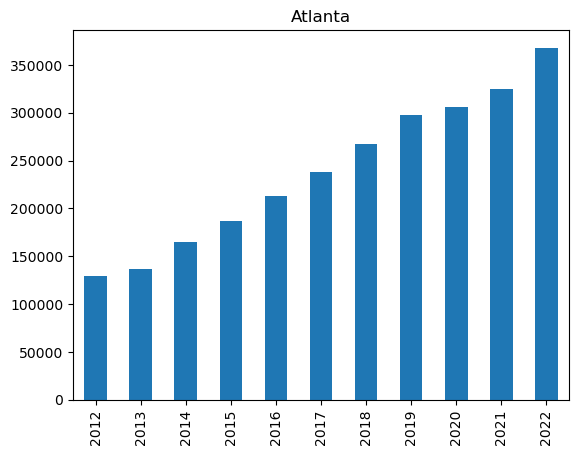

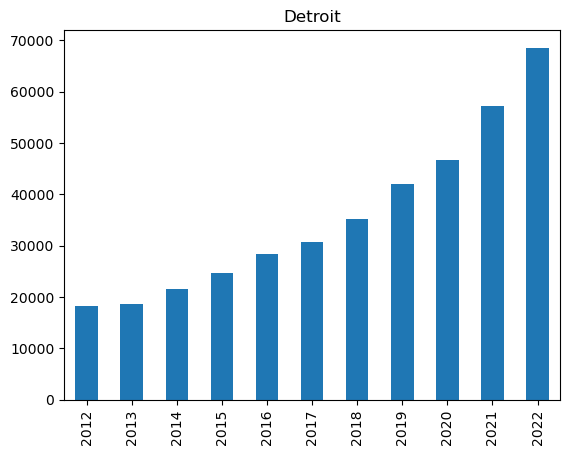

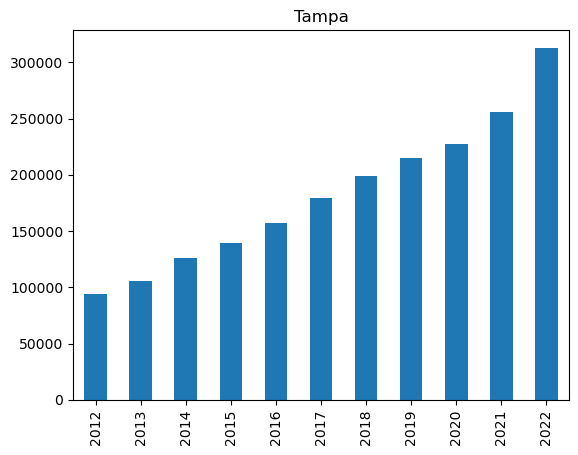

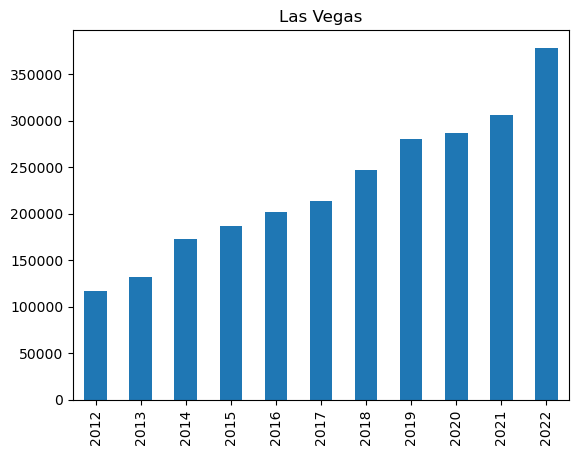

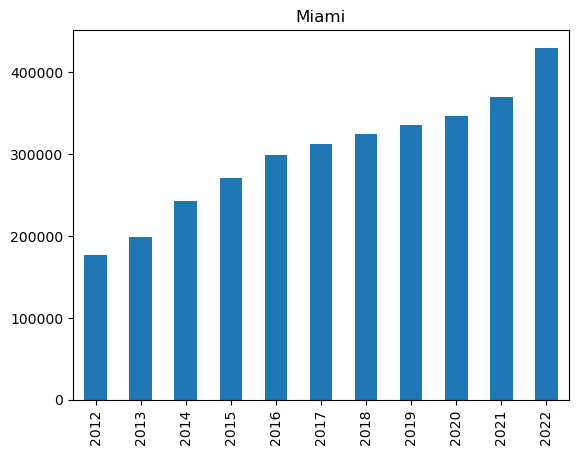

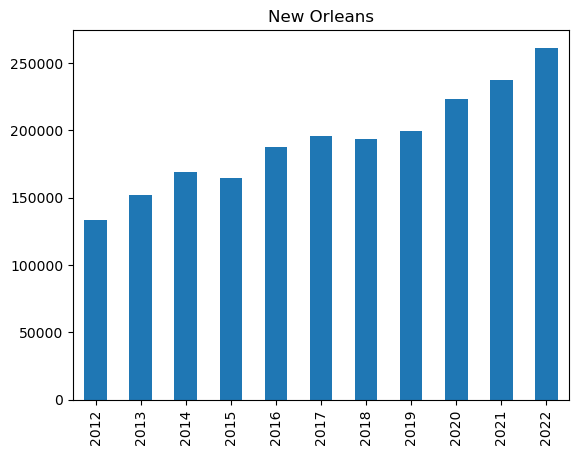

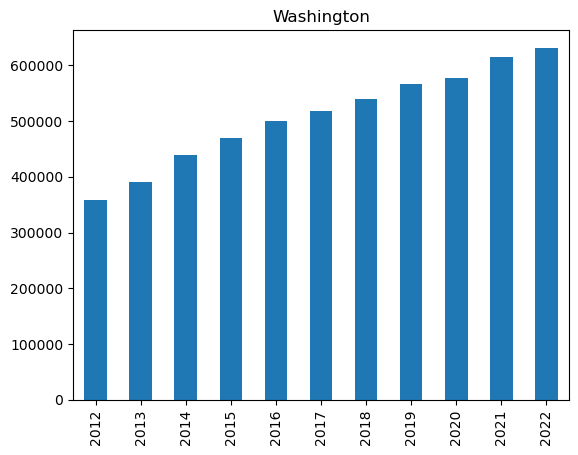

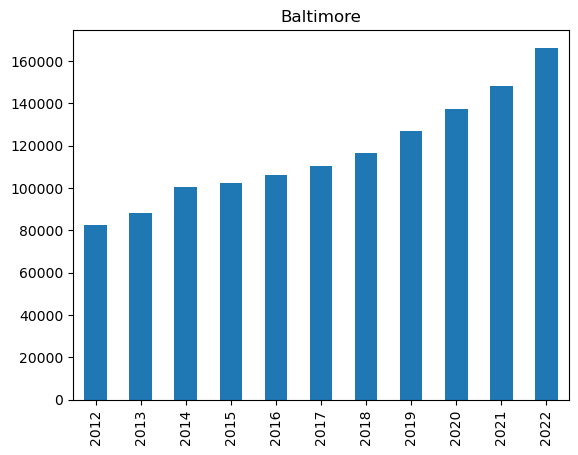

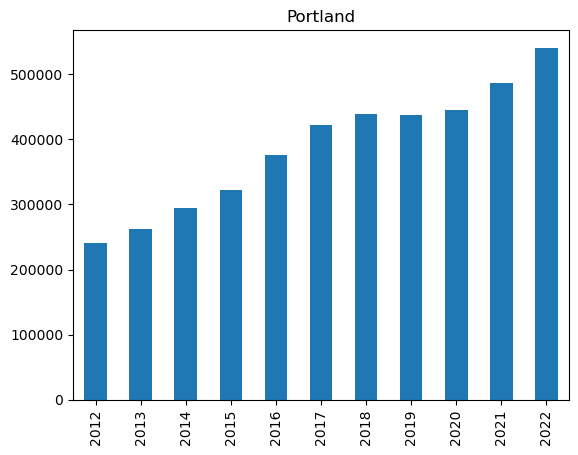

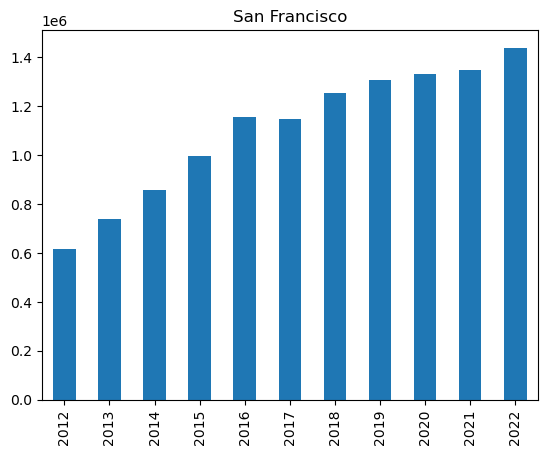

In [93]:
# converting to a dataframe
real_estate_prices_plot = pd.DataFrame(real_estate_prices)

# drops extra washington from "Washington Michigan" from the dataframe
real_estate_prices_plot = real_estate_prices_plot.iloc[:, :-1] 

# this for loop loops through each city and plots a graph for it showing the increase to home values over 10 years
for city in cities:
    current_city = real_estate_prices_plot[[city]].plot(kind="bar", title=city, legend=False)
    plt.show()

# These are all code snippets from our attempts to graph this data
# df = pd.DataFrame(real_estate_prices)
# # Set the 'City' column as the index
# # Filter the DataFrame to include only the row corresponding to Miami
# miami_prices = df.loc['Miami']
# miami_prices = miami_prices.drop(columns=["StateName","Metro"], inplace=False)
# miami_prices.head()
# miami_prices_plot = pd.DataFrame(miami_prices)
# miami_prices_plot.plot()
# # Plot a bar graph for real estate prices in Miami
# miami_prices.plot(kind='bar', color='skyblue', figsize=(10, 6))
# # Add title and labels
# plt.title('Real Estate Prices in Miami (2012-2022)')
# plt.xlabel('Year')
# plt.ylabel('Price')
# # Show the plot
# plt.show()